# pandas 练习
## 1. Pandas Series

In [ ]:
import pandas as pd

countries = ['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
             'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
             'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
             'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia']

life_expectancy_values = [74.7,  75. ,  83.4,  57.6,  74.6,  75.4,  72.3,  81.5,  80.2,
                          70.3,  72.1,  76.4,  68.1,  75.2,  69.8,  79.4,  70.8,  62.7,
                          67.3,  70.6]

gdp_values = [ 1681.61390973,   2155.48523109,  21495.80508273,    562.98768478,
              13495.1274663 ,   9388.68852258,   1424.19056199,  24765.54890176,
              27036.48733192,   1945.63754911,  21721.61840978,  13373.21993972,
                483.97086804,   9783.98417323,   2253.46411147,  25034.66692293,
               3680.91642923,    366.04496652,   1175.92638695,   1132.21387981]

# Life expectancy and gdp data in 2007 for 20 countries
life_expectancy = pd.Series(life_expectancy_values)
gdp = pd.Series(gdp_values)

In [ ]:
# Change False to True for each block of code to see what it does

# Accessing elements and slicing
if False:
    print life_expectancy[0]
    print gdp[3:6]
    
# Looping
if False:
    for country_life_expectancy in life_expectancy:
        print 'Examining life expectancy {}'.format(country_life_expectancy)
        
# Pandas functions
if False:
    print life_expectancy.mean()
    print life_expectancy.std()
    print gdp.max()
    print gdp.sum()

# Vectorized operations and index arrays
if False:
    a = pd.Series([1, 2, 3, 4])
    b = pd.Series([1, 2, 1, 2])
  
    print a + b
    print a * 2
    print a >= 3
    print a[a >= 3]
   

In [ ]:
def variable_correlation(variable1, variable2):
    '''
    Fill in this function to calculate the number of data points for which
    the directions of variable1 and variable2 relative to the mean are the
    same, and the number of data points for which they are different.
    Direction here means whether each value is above or below its mean.
    
    You can classify cases where the value is equal to the mean for one or
    both variables however you like.
    
    Each argument will be a Pandas series.
    
    For example, if the inputs were pd.Series([1, 2, 3, 4]) and
    pd.Series([4, 5, 6, 7]), then the output would be (4, 0).
    This is because 1 and 4 are both below their means, 2 and 5 are both
    below, 3 and 6 are both above, and 4 and 7 are both above.
    
    On the other hand, if the inputs were pd.Series([1, 2, 3, 4]) and
    pd.Series([7, 6, 5, 4]), then the output would be (0, 4).
    This is because 1 is below its mean but 7 is above its mean, and
    so on.
    '''
    direction_1 = variable1 > variable1.mean()
    direction_2 = variable2 > variable2.mean()
    num_same_direction = sum(direction_1 == direction_2)
    num_different_direction = sum(direction_1 != direction_2)
    
    return (num_same_direction, num_different_direction)

In [ ]:
variable1 = life_expectancy
variable2 = gdp
variable_correlation(variable1, variable2)

## 2. Series 索引

In [ ]:
import pandas as pd

countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Angola',
    'Argentina', 'Armenia', 'Australia', 'Austria',
    'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
    'Barbados', 'Belarus', 'Belgium', 'Belize',
    'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
]


employment_values = [
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076,
]

# Employment data in 2007 for 20 countries
employment = pd.Series(employment_values, index=countries)

print employment

In [ ]:
employment.argmax()

In [ ]:
def max_employment(employment):
    '''
    Fill in this function to return the name of the country
    with the highest employment in the given employment
    data, and the employment in that country.
    
    The input will be a Pandas series where the values
    are employment and the index is country names.
    
    Try using the Pandas idxmax() function. Documention can
    be found here:
    http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html
    '''
    max_country = employment.argmax()
    max_value = employment.loc[max_country]

    return (max_country, max_value)

print max_employment(employment)

## 3. 向量化运算和 Series 索引

In [ ]:
import pandas as pd

# Change False to True for each block of code to see what it does

# Addition when indexes are the same
if False:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
    print s1 + s2

# Indexes have same elements in a different order
if False:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['b', 'd', 'a', 'c'])
    print s1 + s2

# Indexes overlap, but do not have exactly the same elements
if False:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
    print s1 + s2

# Indexes do not overlap
if True:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['e', 'f', 'g', 'h'])
    print s1 + s2

## 4. 填充缺失值

In [ ]:
import pandas as pd

s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])

# Try to write code that will add the 2 previous series together,
# but treating missing values from either series as 0. The result
# when printed out should be similar to the following line:
# print pd.Series([1, 2, 13, 24, 30, 40], index=['a', 'b', 'c', 'd', 'e', 'f'])

In [ ]:
# 方法1
s = pd.concat([s1,s2], axis = 1)
s = s.fillna(0)
s = s[0] + s[1]
print s

In [ ]:
# 方法2
s = s1.add(s2, fill_value=0)
print s

## 5. Pandas Series apply()

In [ ]:
import pandas as pd

# Change False to True to see what the following block of code does

# Example pandas apply() usage (although this could have been done
# without apply() using vectorized operations)
if False:
    s = pd.Series([1, 2, 3, 4, 5])
    def add_one(x):
        return x + 1
    print s.apply(add_one)

In [ ]:
names = pd.Series([
    'Andre Agassi',
    'Barry Bonds',
    'Christopher Columbus',
    'Daniel Defoe',
    'Emilio Estevez',
    'Fred Flintstone',
    'Greta Garbo',
    'Humbert Humbert',
    'Ivan Ilych',
    'James Joyce',
    'Keira Knightley',
    'Lois Lane',
    'Mike Myers',
    'Nick Nolte',
    'Ozzy Osbourne',
    'Pablo Picasso',
    'Quirinus Quirrell',
    'Rachael Ray',
    'Susan Sarandon',
    'Tina Turner',
    'Ugueth Urbina',
    'Vince Vaughn',
    'Woodrow Wilson',
    'Yoji Yamada',
    'Zinedine Zidane'
])

In [ ]:
def reverse_names(names):
    '''
    Fill in this function to return a new series where each name
    in the input series has been transformed from the format
    "Firstname Lastname" to "Lastname, FirstName".
    
    Try to use the Pandas apply() function rather than a loop.
    '''
    name_split = names.split()
    new_name = ' '.join(name_split[::-1])
    return new_name

print names.apply(reverse_names)

## 6. 在 Pandas 中绘图

In [8]:
import pandas as pd
import seaborn as sns

sns.set(color_codes=True)
# The following code reads all the Gapminder data into Pandas DataFrames. You'll
# learn about DataFrames next lesson.

path = '/datasets/ud170/gapminder/'
path = ''
employment = pd.read_csv(path + 'employment-above-15.csv', index_col='Country')
female_completion = pd.read_csv(path + 'female-completion-rate.csv', index_col='Country')
male_completion = pd.read_csv(path + 'male-completion-rate.csv', index_col='Country')
life_expectancy = pd.read_csv(path + 'life-expectancy.csv', index_col='Country')
gdp = pd.read_csv(path + 'gdp-per-capita.csv', index_col='Country')

In [2]:
# The following code creates a Pandas Series for each variable for the United States.
# You can change the string 'United States' to a country of your choice.

employment_us = employment.loc['United States']
female_completion_us = female_completion.loc['United States']
male_completion_us = male_completion.loc['United States']
life_expectancy_us = life_expectancy.loc['United States']
gdp_us = gdp.loc['United States']

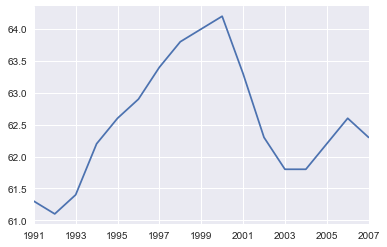

In [13]:
# Uncomment the following line of code to see the available country names
# print employment.index.values

# Use the Series defined above to create a plot of each variable over time for
# the country of your choice. You will only be able to display one plot at a time
# with each "Test Run".
%matplotlib inline
employment_us.plot()

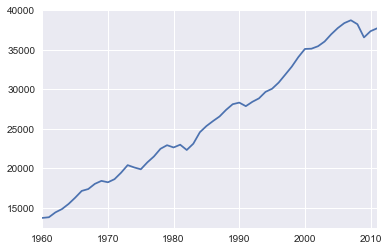

In [12]:
gdp_us.plot()

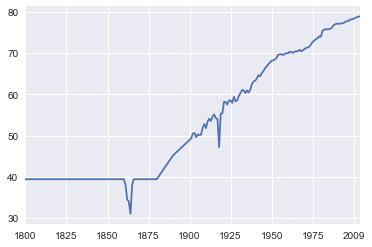

In [14]:
life_expectancy_us.plot()